In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import multiprocessing
from multiprocessing import Pool
import os
import matplotlib.cm as cm

In [2]:
file  = "800day_HS_front_RH50_PR10_PRRELAX86400_with_w_all.dat"
# file = "RH50_test_f0_all.dat"
ds = h5py.File(file, "r")
print(ds.keys())

print(np.nanmax(np.asarray(ds["grid_u_c_xyzt"])))


<KeysViewHDF5 ['_types', 'grid_geopots_xyzt', 'grid_lnp_full_xyzt', 'grid_lnp_half_xyzt', 'grid_lnps_xyzt', 'grid_p_full_xyzt', 'grid_p_half_xyzt', 'grid_ps_xyzt', 'grid_t_c_xyzt', 'grid_t_eq_xyzt', 'grid_tracers_c_xyz1t', 'grid_tracers_diff_xyz1t', 'grid_tracers_n_xyz1t', 'grid_tracers_p_xyz1t', 'grid_u_c_xyzt', 'grid_v_c_xyzt', 'grid_vor_c_xyzt', 'grid_w_full_xyzt', 'grid_Δp_xyzt', 'spe_div_c_xyzt', 'spe_lnps_c_xyzt', 'spe_lnps_p_xyzt', 'spe_vor_c_xyzt']>
100.05583710541687


In [3]:
lat_0 = np.array([-1.5335125830545813, -1.485214577958351, -1.4366313478480872, -1.3879836743385505, -1.3393115571950114, -1.2906276131055214, -1.241937060919817, -1.1932424462905298, -1.144545157917862, -1.0958460174998903, -1.0471455422784188, -0.9984440741325684, -0.9497418481523823, -0.9010390313853844, -0.8523357458658898, -0.8036320828934408, -0.7549281122089407, -0.7062238880767123, -0.6575194534257702, -0.6088148427373913, -0.5601100841016827, -0.5114052007106801, -0.4627002119616472, -0.41399513428591594, -0.3652899817814796, -0.31658476670341296, -0.26787949985019416, -0.21917419087322776, -0.17046884852950536, -0.12176348089226514, -0.07305809553098731, -0.024352699669631092, 0.024352699669631092, 0.07305809553098731, 0.12176348089226514, 0.17046884852950536, 0.21917419087322776, 0.26787949985019416, 0.31658476670341296, 0.3652899817814796, 0.41399513428591594, 0.4627002119616472, 0.5114052007106801, 0.5601100841016827, 0.6088148427373913, 0.6575194534257702, 0.7062238880767123, 0.7549281122089407, 0.8036320828934408, 0.8523357458658898, 0.9010390313853844, 0.9497418481523823, 0.9984440741325684, 1.0471455422784188, 1.0958460174998903, 1.144545157917862, 1.1932424462905298, 1.241937060919817, 1.2906276131055214, 1.3393115571950114, 1.3879836743385505, 1.4366313478480872, 1.485214577958351, 1.5335125830545813]) * 180 / np.pi
lat = np.broadcast_to(lat_0, (20, 128, 64))


In [4]:
class Dycore:
    def __init__(self, file):
        self.ds = h5py.File(file, "r")
        
    def getVar(self, var):
        return np.asarray(self.ds[var])

In [5]:
file  = "800day_HS_front_RH50_PR10_PRRELAX86400_with_w_all.dat"
ds = h5py.File(file, "r")
print(ds.keys())



<KeysViewHDF5 ['_types', 'grid_geopots_xyzt', 'grid_lnp_full_xyzt', 'grid_lnp_half_xyzt', 'grid_lnps_xyzt', 'grid_p_full_xyzt', 'grid_p_half_xyzt', 'grid_ps_xyzt', 'grid_t_c_xyzt', 'grid_t_eq_xyzt', 'grid_tracers_c_xyz1t', 'grid_tracers_diff_xyz1t', 'grid_tracers_n_xyz1t', 'grid_tracers_p_xyz1t', 'grid_u_c_xyzt', 'grid_v_c_xyzt', 'grid_vor_c_xyzt', 'grid_w_full_xyzt', 'grid_Δp_xyzt', 'spe_div_c_xyzt', 'spe_lnps_c_xyzt', 'spe_lnps_p_xyzt', 'spe_vor_c_xyzt']>


In [28]:
def plot_EMF_80(pr):
    # file  = f"HS_front_RH50_PR{pr}_PRRELAX86400_day0_500_all.dat" # ./outputs/withprecip/
    file  = f"1600day_HS_front_RH50_PR{pr}_PRRELAX86400_with_w_all.dat"
    

    dycore = Dycore(file)
    qv = dycore.getVar("grid_tracers_p_xyz1t")
    u = dycore.getVar("grid_u_c_xyzt")
    v = dycore.getVar("grid_v_c_xyzt")
    t = dycore.getVar("grid_t_c_xyzt")
    p  = dycore.getVar("grid_p_full_xyzt")
    qv_diff = dycore.getVar("grid_tracers_diff_xyz1t")
    
    # p = dycore.getVar("grid_p_full_xyzt")
    # sigma = dycore.getVar("grid_p_full_xyzt") / dycore.getVar("grid_ps_xyzt")

    v_prime = np.rollaxis((np.rollaxis(v, 3, 0) - np.nanmean(v, axis=3)), 0, 4)
    u_prime = np.rollaxis((np.rollaxis(u, 3, 0) - np.nanmean(u, axis=3)), 0, 4)
    t_prime = np.rollaxis((np.rollaxis(t, 3, 0) - np.nanmean(t, axis=3)), 0, 4)
    qv_prime = np.rollaxis((np.rollaxis(qv, 3, 0) - np.nanmean(qv, axis=3)), 0, 4)

    tmp = np.nanmean(u[:,:,32:,:], axis=(0, 3))
    jet_k, _ = np.unravel_index(tmp.argmax(), tmp.shape)
    b = t_prime / np.nanmean(t) * 9.81

    eddy_flux_momentum = np.nanmean(u_prime * v_prime, axis=(0, 3))
    
    eddy_flux_q = np.nanmean(qv_prime * v_prime, axis=(0, 3))

    eddy_flux_heat = np.nanmean(b * v_prime, axis=(0, 1, 3))
    
    eddy_flux_kinetic = 0.5 * np.nanmean((u_prime**2 + v_prime**2)**0.5, axis=(0, 3))
    
    ###
    # qv_diff_sum = np.nansum(qv_diff[:,:,:,:], axis=(0,1,3))
    g = 9.81
    prec = np.zeros(u.shape)
    for i in range(1,20-1):
        prec[-100:,i,:,:] = 1 / g * qv_diff[-100:,i,:,:] * (p[-100:,i+1,:,:] - p[-100:,i-1,:,:])
    prec_mean = np.nansum(prec, axis=1)
    prec_mean2 = np.nanmean(prec_mean, axis=(0,2))
    
    

    # return eddy_flux_momentum[jet_k], eddy_flux_q[19], eddy_flux_heat
    return eddy_flux_momentum[jet_k], eddy_flux_q[19], eddy_flux_heat, eddy_flux_kinetic[jet_k], prec_mean2 

In [29]:
leap = 5
to = 25
nProc = 2
# with Pool(nProc) as p:
#     results = [p.apply_async(plot_EMF_80, (t, )) for t in range(0, to, leap)]
#     final_80 = [result.get() for result in results]
EMF_80   = np.zeros((6,32))
EQF_80   = np.zeros((6,32))
EHF_80   = np.zeros((6,32))
EKF_80   = np.zeros((6,32))
prec_80     = np.zeros((6,64))



for t in range(0, to, leap):
    EMF_results, EQF_results, EHF_results, EKF_results, prec_results = plot_EMF_80(t)    
    a = int(t/5.)
    print(a)
    # for result in range(32):
    #     print(result.shape)
    #     print(result)
    EMF_80[a,:] = EMF_results[32:]
    EQF_80[a,:] = EQF_results[32:]
    EHF_80[a,:] = EHF_results[32:]
    EKF_80[a,:] = EKF_results[32:]
    prec_80[a,:]  = prec_results[:] #* float(t)
    
    
print(EMF_80.shape)
print(EMF_80)


0
1
2
3
4
(6, 32)
[[ 1.67937993e-01  5.17329587e-01  1.51965679e+00  3.66056919e+00
   7.68634238e+00  1.44682223e+01  2.45115702e+01  3.68551241e+01
   4.95040521e+01  6.07994551e+01  6.90930797e+01  7.30874112e+01
   7.15800083e+01  6.38981599e+01  5.12617532e+01  3.63923066e+01
   2.18359503e+01  9.53133001e+00  3.18785611e-01 -5.79556368e+00
  -9.18284377e+00 -1.03997392e+01 -1.01474657e+01 -8.98088406e+00
  -7.46315507e+00 -5.97188288e+00 -4.62759041e+00 -3.39099244e+00
  -2.23577223e+00 -1.24906933e+00 -5.24837283e-01 -1.01399448e-01]
 [ 3.63453597e-01  7.24391452e-01  1.64483636e+00  3.80792181e+00
   7.98868648e+00  1.47328069e+01  2.42830236e+01  3.64062232e+01
   4.89828278e+01  6.00385487e+01  6.84329733e+01  7.34302201e+01
   7.38790276e+01  6.94287380e+01  6.02102815e+01  4.78685931e+01
   3.43187791e+01  2.05712030e+01  8.52549741e+00 -2.24335791e-01
  -5.47573920e+00 -7.96944242e+00 -8.68290590e+00 -8.30759372e+00
  -7.19156644e+00 -5.78956453e+00 -4.38260508e+00 -3.1499

0
5
10
15
20


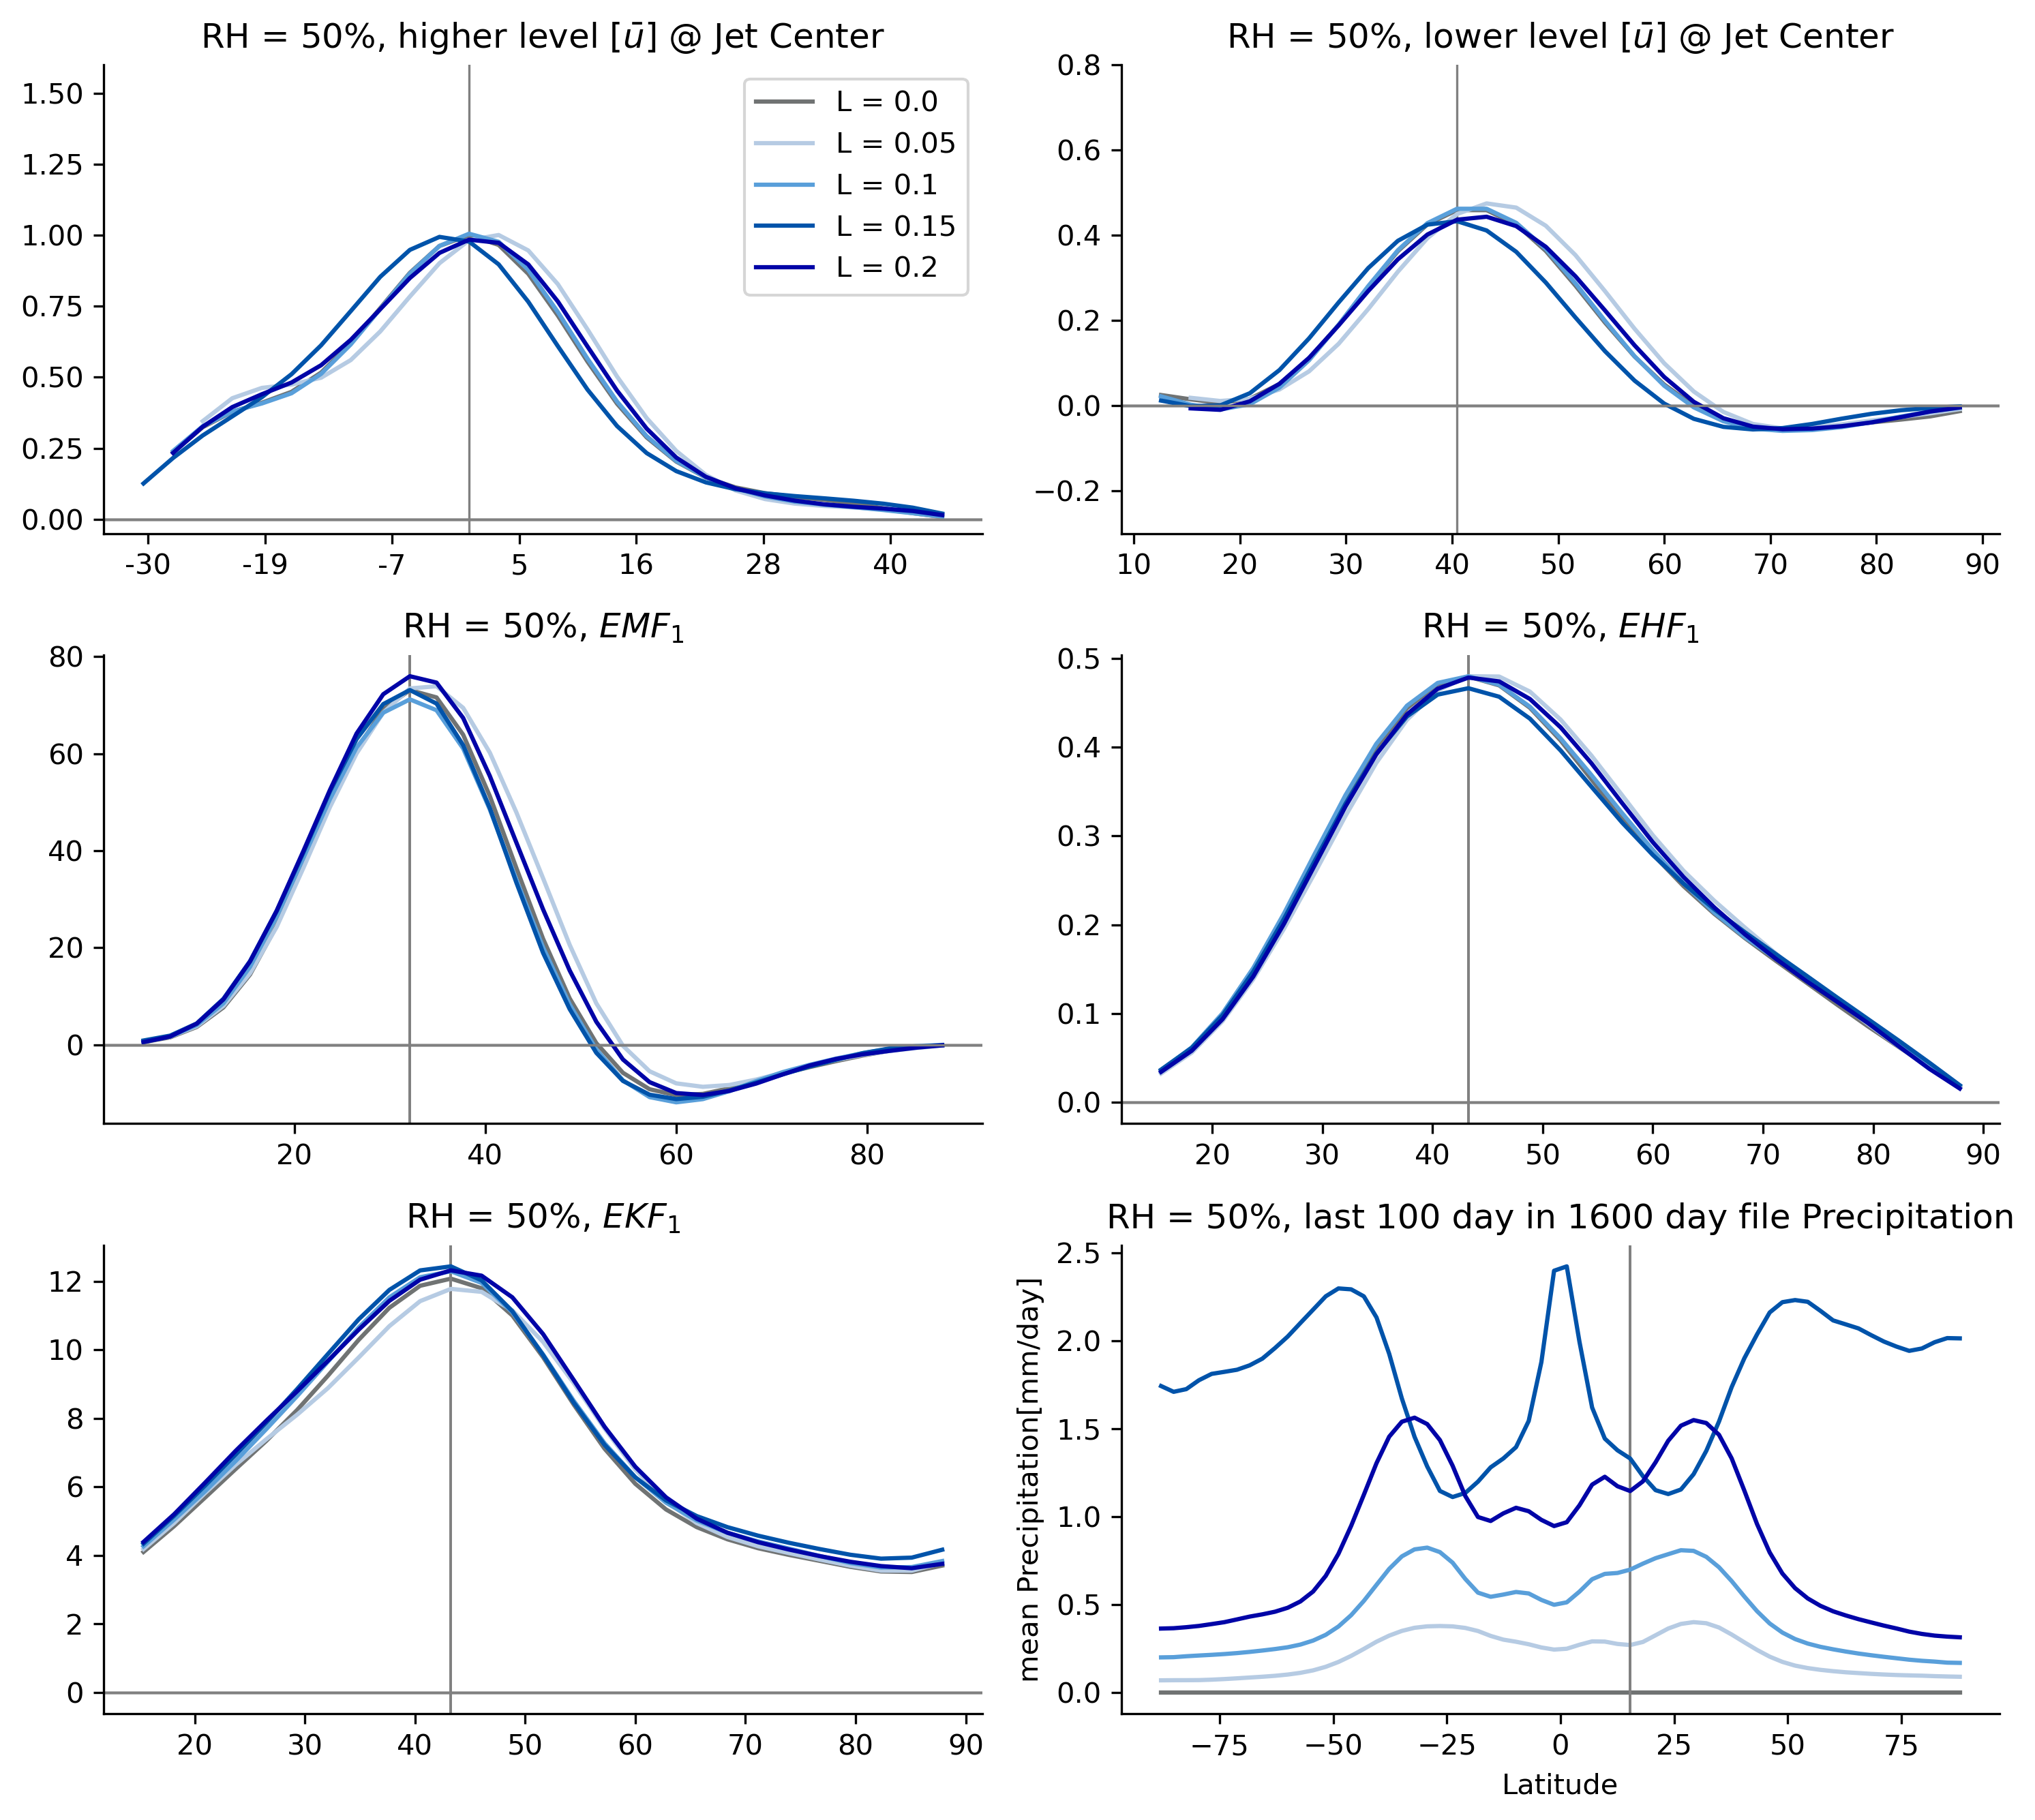

In [30]:
import matplotlib.colors as colors
import matplotlib as mpl

fig, ax = plt.subplots(3, 2, figsize=(10, 9), dpi=300.)
### for color
rgb=([112,115,115])
rgb=np.array(rgb)/255.0
icmap=colors.ListedColormap(rgb,name='my_color')
cmap=mpl.cm.viridis

cmap_color=icmap  
# bound=[1E-4,10E-4,25E-4,50e-4,100E-4,150E-4,200E-4,250e-4]
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255

for pr in range(0, 25, 5):
    print(pr)
    # file  = f"HS_front_RH80_PR{pr}_PRRELAX86400_all.dat" # ./outputs/withprecip/
    # file  = f"HS_front_RH50_PR{pr}_PRRELAX86400_day0_500_all.dat" # ./outputs/withprecip/
    file  = f"800day_HS_front_RH50_PR{pr}_PRRELAX86400_with_w_all.dat"
    
    
    dycore = Dycore(file)
    qv = dycore.getVar("grid_tracers_p_xyz1t")
    u = dycore.getVar("grid_u_c_xyzt")
    v = dycore.getVar("grid_v_c_xyzt")
    qv_diff = dycore.getVar("grid_tracers_diff_xyz1t")
    # print(qv_diff.shape)
    qv_diff_sum = np.nansum(qv_diff[:,:,:,:], axis=(0,1,3))

    tmp = np.nanmean(u[:,:,32:,:], axis=(0, 3))
    k, i = np.unravel_index(tmp.argmax(), tmp.shape)

    u_jet = u[:,k,32:,:]
    u_jet_zonal_time_mean = np.nanmean(u_jet, axis=(0, 2))
    u_max_idx = np.argmax(u_jet_zonal_time_mean)
    if pr == 0:
        control = np.nanmax(u_jet_zonal_time_mean[u_max_idx-10:u_max_idx+25+1])
    ax[0,0].plot(lat_0[32:][u_max_idx-10:u_max_idx+25+1], u_jet_zonal_time_mean[u_max_idx-10:u_max_idx+25+1] / control, label=f"L = {pr/100}", color=colors[int(pr/5)])
    ax[0,0].set_title(r"RH = 50%, higher level [$\bar{u}$] @ Jet Center")
    # ax[0,0].set_ylim(np.min(u_jet_zonal_time_mean[u_max_idx-10:u_max_idx+25+1])-2, np.max(u_jet_zonal_time_mean[u_max_idx-10:u_max_idx+25+1])+2)
    ax[0,0].axhline(y=0, color='gray', lw=0.8)
    # ax[0,0].set_xticks(np.arange(0,90,10))
    ax[0,0].legend()
    if pr == 0:
        ax[0,0].axvline(x=lat_0[32:][u_max_idx], color='gray', lw=0.8)
    ax[0,0].set_ylim([-0.05,1.6])
    # lat_0[32:][u_max_idx]
    ax[0,0].set_xticks(np.linspace(lat_0[32:][u_max_idx]-30,lat_0[32:][u_max_idx]+40,7,dtype=np.int64),
                       np.linspace(lat_0[32:][u_max_idx]-30 - lat_0[32:][u_max_idx],lat_0[32:][u_max_idx]+40 - lat_0[32:][u_max_idx],7, dtype=np.int64))
    # xticks = ax[0,0].get_xticks()
    # print(len(xticks))
    # ax[0,0].set_xticks(xticks-xticks[5])
    # ax[0,0].set_xticks(lat_0[32:][u_max_idx-10:u_max_idx+25+1][0::2])
    # ax[0,0].set_xticklabel(lat_0[32:][u_max_idx-10:u_max_idx+25+1][0::2])
    
    ax[0,0].spines["right"].set_visible(False)
    ax[0,0].spines["top"].set_visible(False)

    EMF_max_idx = np.argmax(EMF_80[int(pr/5)])
    ax[1,0].set_title(r"RH = 50%, $EMF_{1}$")
    ax[1,0].plot(lat_0[32:][EMF_max_idx-10:EMF_max_idx+25+1], EMF_80[int(pr/5)][EMF_max_idx-10:EMF_max_idx+25+1]  , label=f"L = {pr/100}", lw='1.5', color=colors[int(pr/5)])
    ax[1,0].axhline(y=0, color='gray', lw=0.8)
    if pr == 0:
        ax[1,0].axvline(x=lat_0[32:][EMF_max_idx], color='gray', lw=0.95)
    # ax[1,0].legend()
    ax[1,0].spines["right"].set_visible(False)
    ax[1,0].spines["top"].set_visible(False)

    EHF_max_idx = np.argmax(EHF_80[int(pr/5)])
    ax[1,1].set_title(r"RH = 50%, $EHF_{1}$")
    ax[1,1].plot(lat_0[32:][EHF_max_idx-10:EHF_max_idx+25+1], EHF_80[int(pr/5)][EHF_max_idx-10:EHF_max_idx+25+1]  , label=f"L = {pr/100}", lw='1.5', color=colors[int(pr/5)])
    ax[1,1].axhline(y=0, color='gray', lw=0.8)
    if pr == 0:
        ax[1,1].axvline(x=lat_0[32:][EHF_max_idx], color='gray', lw=0.95)
    # ax[1,1].legend()
    ax[1,1].spines["right"].set_visible(False)
    ax[1,1].spines["top"].set_visible(False)
    
    EKF_max_idx = np.argmax(EKF_80[int(pr/5)])
    ax[2,0].set_title(r"RH = 50%, $EKF_{1}$")
    ax[2,0].plot(lat_0[32:][EKF_max_idx-10:EHF_max_idx+25+1], EKF_80[int(pr/5)][EKF_max_idx-10:EKF_max_idx+25+1]  , label=f"L = {pr/100}", lw='1.5', color=colors[int(pr/5)])
    ax[2,0].axhline(y=0, color='gray', lw=0.8)
    if pr == 0:
        ax[2,0].axvline(x=lat_0[32:][EKF_max_idx], color='gray', lw=0.95)
    # ax[2,0].legend()
    ax[2,0].spines["right"].set_visible(False)
    ax[2,0].spines["top"].set_visible(False)
    
    prec_max_idx = np.argmax(prec_80[int(pr/5),5:])
    ax[2,1].plot(lat_0[:], prec_80[int(pr/5), :] * int(pr), label=f"L = {pr/100}", color=colors[int(pr/5)])
    ax[2,1].set_title(r"RH = 50%, last 100 day in 1600 day file Precipitation")
    # ax[1,1].set_ylim(np.min(qv_diff_sum[u_max_idx-10:u_max_idx+25+1])-0.1, np.max(qv_diff_sum[u_max_idx-10:u_max_idx+25+1])+0.1)
    # ax[2,1].set_ylim(np.min(qv_diff_sum[P_max_idx-10:P_max_idx+25+1] * int(pr/5)/ int(np.size(qv_diff[-200:,0,0,0]))-0.5), np.max(qv_diff_sum[P_max_idx-10:P_max_idx+25+1] * int(pr/5))/ int(np.size(qv_diff[-200:,0,0,0]))+0.3)
    # ax[2,1].legend()
    if pr == 5:
        ax[2,1].axvline(x=lat_0[:][prec_max_idx], color='gray', lw=0.95)
    ax[2,1].set_ylabel("mean Precipitation[mm/day]")
    ax[2,1].set_xlabel("Latitude")
    ax[2,1].spines["right"].set_visible(False)
    ax[2,1].spines["top"].set_visible(False)
    
    # lower level
    k = 14
    u_jet = u[:,k,32:,:]
    u_jet_zonal_time_mean = np.nanmean(u_jet, axis=(0, 2))
    u_max_idx = np.argmax(u_jet_zonal_time_mean)
    if pr == 0:
        ax[0,1].axvline(x=lat_0[32:][u_max_idx], color='gray', lw=0.8)
    ax[0,1].plot(lat_0[32:][u_max_idx-10:u_max_idx+25+1], u_jet_zonal_time_mean[u_max_idx-10:u_max_idx+25+1] / control, label=f"L = {pr/100}", color=colors[int(pr/5)])
    ax[0,1].set_title(r"RH = 50%, lower level [$\bar{u}$] @ Jet Center")
    ax[0,1].set_ylim([-0.3, 0.8])
    # ax[0,1].legend()
    ax[0,1].axhline(y=0, color='gray', lw=0.8)
    ax[0,1].spines["right"].set_visible(False)
    ax[0,1].spines["top"].set_visible(False)
    

# plt.savefig(r"/Users/PeterChang/from_KCT/dycore/IdealizeSpetral.jl/exp/HSt42/paper1_fig/Nick Lusaka paper reproduce//RH50.png", dpi=300., bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
print(np.nanmax(qv_diff_sum))

NameError: name 'yy' is not defined